<a href="https://colab.research.google.com/github/Alvaro-Garcia-Parra/AA_GRUPO3/blob/main/Lab04_Pr4PUBG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Librerías y funciones a utilizar

In [287]:
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori
from mlxtend import frequent_patterns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from nltk.cluster.kmeans import KMeansClusterer
from scipy.spatial import distance
from nltk import cluster

# Objetivo
Bluehole, la empresa encargada del videojuego PlayerUnknown’s Battlegrounds quiere introducir nuevos
paquetes dependiendo del tipo de jugador. Para ello dispone de estadísticas de los 200 mejores jugadores.Aplica un algoritmo de manera que se obtengan dichos grupos.

1) Utiliza varias configuraciones teniendo en cuenta el número de grupos que se creará y cambiando cómo
se mide la distancia entre individuos. Crea una tabla donde se incluya toda la información y el número
necesario de iteraciones para llegar a dicha solución. Se considera la mejor solución aquella que necesite
menos iteraciones.

2) Con la mejor configuración del punto anterior. Utiliza dos criterios para elegir el lugar inicial del
punto central de los grupos. Dibuja cómo se van modificando los grupos y cómo van cambiando
sus centroides en cada iteración. Obtén una conclusión acerca de dónde deberían situarse los
centroides.

3) Estudia qué técnicas de preprocesamiento se podrían incluir en base al error cometido en cada
cluster.

## Desarrollo
### Lectura y preprocesamiento de los datos
No hay datos vacíos ni duplicados

In [288]:
# Lectura de la base de datos
filename = 'PUBG.csv'
data = pd.read_csv(filename, sep = ',')

# Revisión de los tipos de datos
print(data.dtypes)
data

player_name             object
tracker_id               int64
solo_KillDeathRatio    float64
solo_WinRatio          float64
solo_TimeSurvived      float64
                        ...   
squad_Heals              int64
squad_Revives            int64
squad_Boosts             int64
squad_DamageDealt      float64
squad_DBNOs              int64
Length: 152, dtype: object


,player_name,tracker_id,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,BreakNeck,4405,3.14,17.65,18469.14,17,3,0.83,4,23.5,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,Blackwalk,8199,4.41,18.18,33014.86,33,6,0.36,11,33.3,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,mercedes_benz,4454,3.60,0.00,4330.44,5,0,0.00,1,20.0,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,DORA,7729,14.00,50.00,13421.82,8,4,0.67,6,75.0,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,n2tstar,0,10.50,33.33,9841.04,6,2,0.40,5,83.3,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,jungwook,11690,3.37,17.33,581263.40,427,74,0.38,195,45.7,...,585880.94,1010687.19,2015.37,2582.05,796.52,520,71,513,69526.76,456
95,Sitton,6042,6.00,27.27,15639.28,11,3,0.60,5,45.5,...,1370085.00,2075036.00,2049.28,3982.80,511.08,823,109,891,97551.31,573
96,PANDATV-TYF,22188,3.05,9.84,243659.10,193,19,0.25,77,39.9,...,1079497.60,1870113.40,1750.42,2107.95,560.26,998,166,741,135111.34,856
97,Great_Cornholio,2260,0.00,0.00,561.04,1,0,0.00,0,0.0,...,1280647.63,2002011.90,1848.11,1898.83,730.65,1088,74,573,119974.01,754


In [289]:
data = data.drop_duplicates()
data.info(verbose=True, null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 98
Data columns (total 152 columns):
 #    Column                     Non-Null Count  Dtype  
---   ------                     --------------  -----  
 0    player_name                99 non-null     object 
 1    tracker_id                 99 non-null     int64  
 2    solo_KillDeathRatio        99 non-null     float64
 3    solo_WinRatio              99 non-null     float64
 4    solo_TimeSurvived          99 non-null     float64
 5    solo_RoundsPlayed          99 non-null     int64  
 6    solo_Wins                  99 non-null     int64  
 7    solo_WinTop10Ratio         99 non-null     float64
 8    solo_Top10s                99 non-null     int64  
 9    solo_Top10Ratio            99 non-null     float64
 10   solo_Losses                99 non-null     int64  
 11   solo_Rating                99 non-null     float64
 12   solo_BestRating            99 non-null     float64
 13   solo_DamagePg              99 non-n

<ipython-input-289-b6607a5c476f>:2: FutureWarning: null_counts is deprecated. Use show_counts instead
  data.info(verbose=True, null_counts=True)


In [290]:
# Eliminamos las dos primeras columnas ya que no nos interesan
data = data.drop(data.columns[[0, 1]], axis = 1)
data

,solo_KillDeathRatio,solo_WinRatio,solo_TimeSurvived,solo_RoundsPlayed,solo_Wins,solo_WinTop10Ratio,solo_Top10s,solo_Top10Ratio,solo_Losses,solo_Rating,...,squad_RideDistance,squad_MoveDistance,squad_AvgWalkDistance,squad_AvgRideDistance,squad_LongestKill,squad_Heals,squad_Revives,squad_Boosts,squad_DamageDealt,squad_DBNOs
0,3.14,17.65,18469.14,17,3,0.83,4,23.5,14,1559.78,...,3751590.99,5194786.58,2626.97,4372.64,536.98,2186,234,1884,242132.73,1448
1,4.41,18.18,33014.86,33,6,0.36,11,33.3,27,1884.53,...,4295917.30,6051783.67,2422.48,6009.73,734.85,2041,276,2340,269795.75,1724
2,3.60,0.00,4330.44,5,0,0.00,1,20.0,5,1255.92,...,3935265.63,5589608.74,1871.89,3011.87,725.44,1766,210,2193,292977.07,1897
3,14.00,50.00,13421.82,8,4,0.67,6,75.0,4,1798.70,...,2738998.00,3796916.00,2154.62,5578.41,587.28,1214,142,1252,181106.90,1057
4,10.50,33.33,9841.04,6,2,0.40,5,83.3,4,1668.67,...,2347295.00,3220260.00,2098.47,5642.54,546.10,1245,120,923,160029.80,1077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,3.37,17.33,581263.40,427,74,0.38,195,45.7,353,2952.00,...,585880.94,1010687.19,2015.37,2582.05,796.52,520,71,513,69526.76,456
95,6.00,27.27,15639.28,11,3,0.60,5,45.5,8,1754.57,...,1370085.00,2075036.00,2049.28,3982.80,511.08,823,109,891,97551.31,573
96,3.05,9.84,243659.10,193,19,0.25,77,39.9,174,2624.78,...,1079497.60,1870113.40,1750.42,2107.95,560.26,998,166,741,135111.34,856
97,0.00,0.00,561.04,1,0,0.00,0,0.0,1,1201.09,...,1280647.63,2002011.90,1848.11,1898.83,730.65,1088,74,573,119974.01,754


In [291]:
from sklearn.decomposition import PCA
# PCA
# Creamos un objeto PCA con 2 componentes
pca = PCA(n_components=2)

# Aplicamos PCA a los datos
data_pca = pca.fit_transform(data)

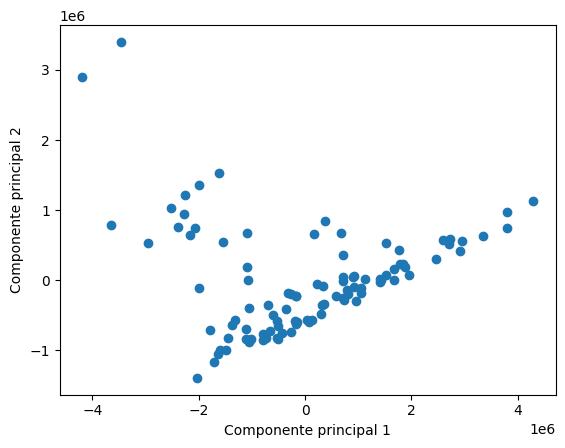

In [292]:
# Creamos un gráfico de dispersión con los datos transformados
plt.scatter(data_pca[:, 0], data_pca[:, 1])
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
plt.show()

In [293]:
n_clusters = [2,3,4,5]
metric = [distance.euclidean, distance.minkowski, distance.cosine]

for n in n_clusters:
  for m in metric:
    print(f"Cluster: {n} \n Distance: {m}")
    kmeans = KMeansClusterer(n, distance = m)
    kmeans = kmeans.cluster(data_pca, assign_clusters= True, trace= True)

Cluster: 2 
 Distance: <function euclidean at 0x7f5b222df520>
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Cluster: 2 
 Distance: <function minkowski at 0x7f5b222df490>
k-means trial 0
iteration
iteration
iteration
iteration
Cluster: 2 
 Distance: <function cosine at 0x7f5b222df6d0>
k-means trial 0
iteration
iteration
iteration
Cluster: 3 
 Distance: <function euclidean at 0x7f5b222df520>
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Cluster: 3 
 Distance: <function minkowski at 0x7f5b222df490>
k-means trial 0
iteration
iteration
iteration
iteration
iteration
iteration
iteration
Cluster: 3 
 Distance: <function cosine at 0x7f5b222df6d0>
k-means trial 0
iteration
iteration
iteration
Cluster: 4 
 Distance: <function euclidean at 0x7f5b222df520>
k-means trial 0
iteration
iteration
iteration
iteration
Cluster: 4 
 Distance: <function minkows

[[ 2337858.17215736   380527.18928693]
 [   27552.6877626   -336094.63174638]
 [-2032233.34089826   337278.00210589]]


<function matplotlib.pyplot.show(close=None, block=None)>

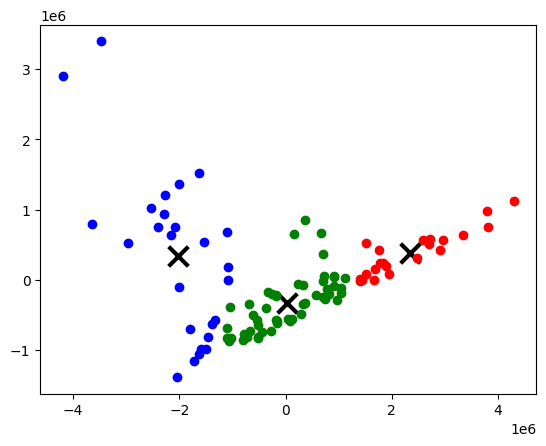

In [294]:
# Centroides aleatorios

kmeans = KMeansClusterer(3, distance = distance.minkowski)
kmeans_ = kmeans.cluster(data_pca, assign_clusters= True)

centroides = np.array(kmeans.means())
print(centroides)

colors = ['red', 'green', 'blue']

data_pca = pd.DataFrame(data_pca, columns = ["Comp_1", "Comp_2"])
data_pca["clusters"] = kmeans_

plt.scatter(centroides[:,0], centroides[:,1], marker='x', s=200, linewidths=3, color='black')
for i in range(3):
    plt.scatter(data_pca[data_pca['clusters'] == i]['Comp_1'], data_pca[data_pca['clusters'] == i]['Comp_2'], color=colors[i])

plt.show

[[ 1670515.8681598    221326.16904032]
 [ -680883.2353717   -531720.19625648]
 [-2549892.83044325  1258394.510114  ]]


<function matplotlib.pyplot.show(close=None, block=None)>

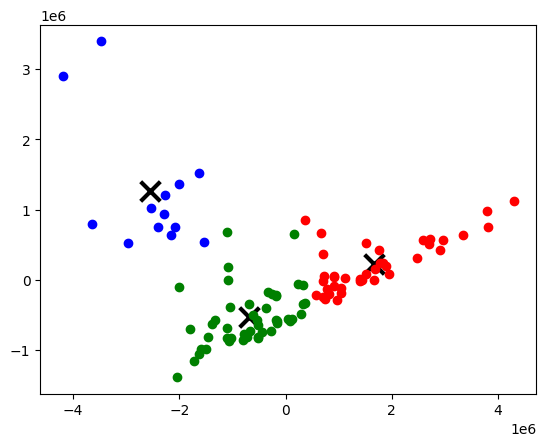

In [295]:
from scipy.cluster.vq import kmeans2
# Centroides basados en la distancia
# inicialización basada en la distancia
data_pca = data_pca.drop('clusters', axis = 1)
centroids, labels = kmeans2(data_pca, k=3, minit='++')
centroids = np.array(centroids)
print(centroids)
data_pca = data_pca.to_numpy()

kmeans = KMeansClusterer(3, distance = distance.minkowski, initial_means = [centroids[0],centroids[1],centroids[2]])
kmeans_ = kmeans.cluster(data_pca, assign_clusters= True)

data_pca = pd.DataFrame(data_pca, columns = ["Comp_1", "Comp_2"])
data_pca["clusters"] = kmeans_

plt.scatter(centroids[:,0], centroids[:,1], marker='x', s=200, linewidths=3, color='black')
for i in range(3):
    plt.scatter(data_pca[data_pca['clusters'] == i]['Comp_1'], data_pca[data_pca['clusters'] == i]['Comp_2'], color=colors[i])

plt.show